In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_69839_U')

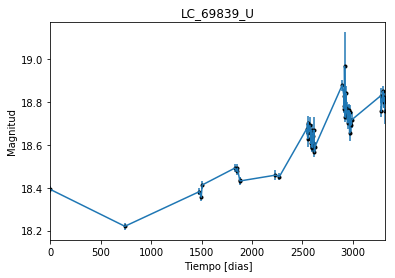

In [2]:
data = np.genfromtxt('LC_69839_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_69839_U')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

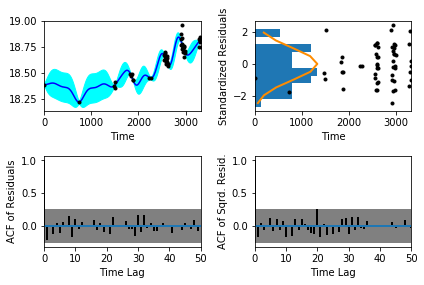

In [5]:
sample.assess_fit()

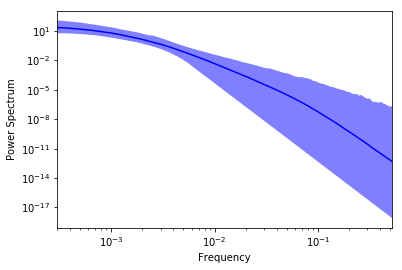

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_69839_U')

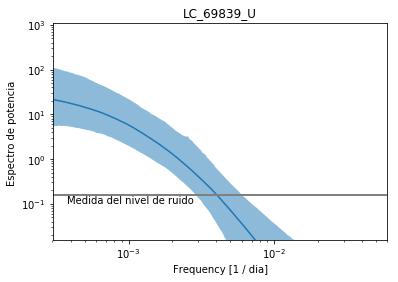

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_69839_U')

Text(0.5,1,'Prediccion , valor esperado LC_69839_U')

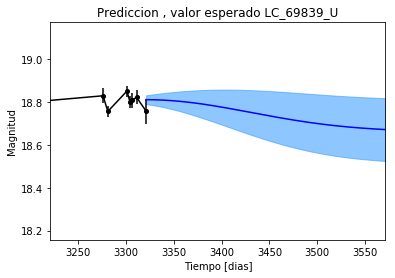

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_69839_U')

Text(0.5,1,'Prediccion, Caminos simulados LC_69839_U')

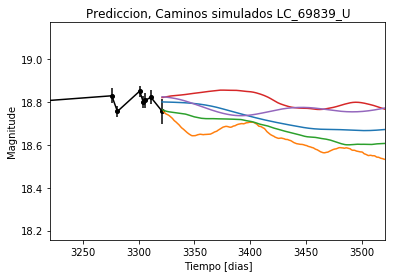

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_69839_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_69839_U')

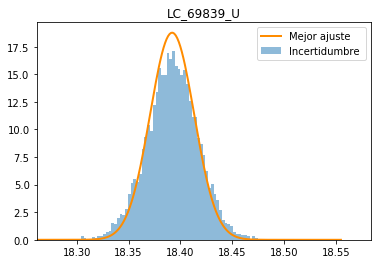

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_69839_U')

Text(0.5,1,'Interpolacion, camino simulado LC_69839_U')

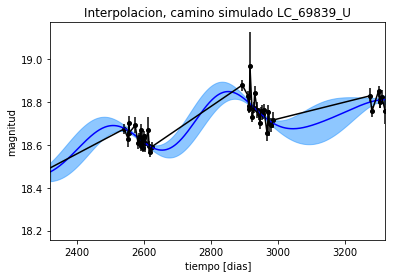

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_69839_U')

Text(0.5,1,'Interpolacion, camino simulado LC_69839_U')

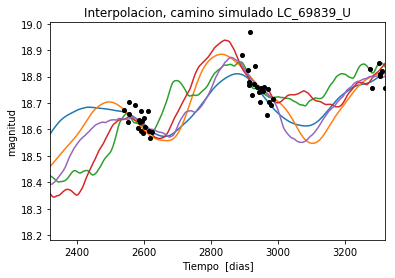

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_69839_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 426.386400335
Median: 0.0139872549967
Standard deviation: 0.217931529556
68% credibility interval: [ 0.00117811  0.21062358]
95% credibility interval: [  3.85364280e-04   8.67758536e-01]
99% credibility interval: [  3.21971103e-04   1.02157806e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 459.453547046
Median: 0.00159449249341
Standard deviation: 0.0770591351486
68% credibility interval: [ 0.00044172  0.01354556]
95% credibility interval: [ 0.00032236  0.19238839]
99% credibility interval: [  3.04650542e-04   5.83773988e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 606.73877324
Median: 0.0154610493205
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2645.86428897
Median: 114.678430385
Standard deviation: 1.70368046065
68% credibility interval: [ 112.73963674  115.89607393]
95% credibility interval: [ 110.23203145  116.72859139]
99% credibility interval: [ 108.11672795  117.45377436]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 634.011901528
Median: 0.768165442249
Standard deviation: 2.06223285744
68% credibility interval: [ 0.06723476  3.81186772]
95% credibility interval: [ 0.01758737  6.76523047]
99% credibility interval: [ 0.01126355  9.34908721]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 696.548686834
Median: 0.247269415213
Standard deviation: 7.79699043427
68% credibility interval: [ 0.01355357  4.12593689]
95% credibility interval: [  6.72502466e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 5032.75978487
Median: 2.32525062271e-26
Standard deviation: 7.15684626531e+82
68% credibility interval: [  1.21558968e-68   3.82879178e-05]
95% credibility interval: [  1.24532381e-104   4.83574399e+001]
99% credibility interval: [  2.31863972e-117   1.27104019e+035]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3650.69305793
Median: 18.502773466
Standard deviation: 0.111063714794
68% credibility interval: [ 18.40744881  18.60180299]
95% credibility interval: [ 18.28138941  18.73087912]
99% credibility interval: [ 18.16111302  18.84167882]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 315.975344917
Median: 0.000273294192503
Standard deviation: 0.221938391664
68% credibility interval: [ 0.          0.20301642]
95% credibility interval: [ 0.          0.84680585]
99% credibility interval: [ 0.          0.99009466]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 315.975344917
Median: 0.000273294192503
Standard deviation: 0.221938391664
68% credibility interval: [ 0.          0.20301642]
95% credibility interval: [ 0.          0.84680585]
99% credibility interval: [ 0.          0.99009466]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1186.67653734
Median: 0.0
Standard deviation: 0.000286300683499
68

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2645.86428897
Median: 114.678430385
Standard deviation: 1.70368046065
68% credibility interval: [ 112.73963674  115.89607393]
95% credibility interval: [ 110.23203145  116.72859139]
99% credibility interval: [ 108.11672795  117.45377436]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2399.84977826
Median: 0.0432272725309
Standard deviation: 0.0528792058546
68% credibility interval: [ 0.0262508   0.08283975]
95% credibility interval: [ 0.01720356  0.18462464]
99% credibility interval: [ 0.01382128  0.3485    ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2099.95814422
Median: 1.14307359356
Standard deviation: 0.177455367401
68% credibility interval: [ 0.98017749  1.33125012]
95% credibility interval: [ 0.85441266  1.54651428]
99% credibility interval: [ 0.78146785  1.70884032]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 447.488309411
Median: 7.40430290483e-05
Standard deviation: 0.0393166508317
68% credibility interval: [  2.82791154e-06   1.71062859e-03]
95% credibility interval: [  4.04188512e-08   2.18494418e-02]
99% credibility interval: [  3.33890749e-39   2.93252860e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 426.386400335
Median: (-0.087884515083+0j)
Standard deviation: 1.95437164737
68% credibility interval: [-1.32338698+0.j        -0.00740225-0.5668513j]
95% credibility interval: [ -5.45228769e+00+0.j          -2.42131518e-03-6.09593836j]
99% credibility interval: [ -6.41876423e+00+0.j         -2.02300410e-03-1.4402665j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 459.453547046
Median: (-0.010018491807+0.0929835932939j)
Standard deviation: 1.47614422907
68% credibility interval: [-0.08510925 +5.73477888e+00j -0.00277538 +3.05881325e-03j]
95% credibility interval: [-1.20881190+0.j -0.00202546+0.j]
99% credibility interval: [ -3.66796014e+00+6.2434978j  -1.91417581e-03+0.j       ]
Posterior summary for parameter ar_roo